

### 1. What is Logistic Regression, and how does it differ from Linear Regression?

#### Logistic Regression:

Logistic Regression is a **supervised machine learning algorithm** used for **classification tasks**, particularly **binary classification** (such as yes/no, spam/ham, pass/fail).

* It predicts the **probability** that a given input belongs to a particular category.
* The output is passed through a **sigmoid function**, which converts it into a probability between 0 and 1.

**Equation**:

$$
P(Y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

---

#### Linear Regression:

Linear Regression is a **supervised learning algorithm** used for **regression tasks**, where the output is a **continuous** numeric value.

**Equation**:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon
$$

---

### Key Differences:

| Feature              | Logistic Regression                            | Linear Regression                          |
| -------------------- | ---------------------------------------------- | ------------------------------------------ |
| Purpose              | Classification                                 | Regression                                 |
| Output               | Probability (0 to 1)                           | Continuous value                           |
| Target Variable      | Categorical (usually binary: 0 or 1)           | Numeric/Continuous                         |
| Function Used        | Sigmoid (logistic) function                    | Linear function                            |
| Best suited for      | Email spam detection, disease prediction, etc. | Price prediction, demand forecasting, etc. |
| Prediction Threshold | Usually 0.5 (if probability ≥ 0.5 → class = 1) | Not applicable                             |


### 2. What is the Mathematical Equation of Logistic Regression?

The core idea behind Logistic Regression is to model the **probability** that the output $Y$ belongs to class 1 (e.g., success, yes, positive) given the input features $X$. Instead of predicting $Y$ directly, logistic regression predicts the **log-odds** (also called the logit), which is then converted into a probability using the **sigmoid function**.

---

#### Step-by-step breakdown:

1. **Linear combination of inputs**:

$$
z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

2. **Sigmoid (logistic) function**:

$$
P(Y = 1 | X) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$

This function outputs a value between 0 and 1, which can be interpreted as a **probability**.

---

#### Log-odds (logit) form:

Alternatively, the model can be expressed in terms of **log-odds**:

$$
\log\left(\frac{P(Y=1|X)}{1 - P(Y=1|X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

This means logistic regression is modeling the **logarithm of the odds** of the positive class as a linear function of the inputs.




### 3. Why Do We Use the Sigmoid Function in Logistic Regression?

The **sigmoid function** is used in logistic regression to map any real-valued number into a range between **0 and 1**, making it ideal for **modeling probabilities**.

---

#### The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where $z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n$

---

### Reasons for Using the Sigmoid Function:

| Reason                        | Explanation                                                                  |
| ----------------------------- | ---------------------------------------------------------------------------- |
| **Probability Output**        | Outputs a value between 0 and 1, making it interpretable as a probability.   |
| **Smooth Gradient**           | Enables gradient-based optimization (like gradient descent) to work well.    |
| **Decision Boundary**         | Allows setting a threshold (e.g., 0.5) to classify inputs into classes.      |
| **Differentiability**         | It is differentiable everywhere, which is essential for training the model.  |
| **Maps Linear to Non-linear** | Converts linear output into a non-linear S-curve, useful for classification. |

---

### Visual Insight:

* For large negative values of $z$, sigmoid outputs values close to **0**.
* For large positive values of $z$, it outputs values close to **1**.
* At $z = 0$, sigmoid outputs **0.5** (the threshold for classification).




### 4. What is the Cost Function of Logistic Regression?

In **logistic regression**, we use a cost function based on **maximum likelihood estimation**, and the most common form is the **log loss** or **binary cross-entropy**.

---

### Cost Function (Log Loss):

For a single training example:

$$
\text{Cost}(h_\theta(x), y) = -y \log(h_\theta(x)) - (1 - y) \log(1 - h_\theta(x))
$$

Where:

* $h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$ is the sigmoid output (predicted probability).
* $y$ is the actual label (0 or 1).

---

### For the entire dataset (with $m$ examples):

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log(h_\theta(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

---

### Why This Cost Function?

* It penalizes wrong predictions **more heavily** than correct ones.
* It is **convex**, which means it has a single global minimum, allowing efficient optimization using gradient descent.
* It ensures that probabilities close to the true labels get **low loss**, while poor predictions result in **high loss**.

---

### Key Properties:

| Property             | Explanation                                         |
| -------------------- | --------------------------------------------------- |
| Convex Function      | Guarantees a unique minimum for optimization.       |
| Probabilistic Output | Works well with the sigmoid output (0–1).           |
| Logarithmic Penalty  | Strongly penalizes confident but wrong predictions. |




### 5. What is Regularization in Logistic Regression? Why is it Needed?

#### **What is Regularization?**

Regularization is a technique used in logistic regression (and other models) to **prevent overfitting** by adding a **penalty term** to the cost function. This penalty discourages the model from fitting the training data too closely by controlling the **magnitude of the model's coefficients**.

---

### Why is Regularization Needed?

Without regularization:

* The model might learn **noise or random fluctuations** in the training data.
* This results in **overfitting**, where the model performs well on training data but poorly on unseen (test) data.
* Large coefficients can lead to **unstable predictions**, especially with small changes in inputs.

Regularization helps to:

* Simplify the model.
* Improve **generalization** to new data.
* Maintain **stability** in predictions.

---

### Types of Regularization in Logistic Regression:

| Type            | Penalty Term              | Description                                                                          |   |                                                                                    |
| --------------- | ------------------------- | ------------------------------------------------------------------------------------ | - | ---------------------------------------------------------------------------------- |
| **L1 (Lasso)**  | ( \lambda \sum            | \theta\_j                                                                            | ) | Encourages sparsity; can shrink some coefficients to **zero** (feature selection). |
| **L2 (Ridge)**  | $\lambda \sum \theta_j^2$ | Penalizes large weights; helps reduce model complexity without eliminating features. |   |                                                                                    |
| **Elastic Net** | Combination of L1 and L2  | Combines benefits of both.                                                           |   |                                                                                    |

---

### Regularized Cost Function Example (L2):

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log(h_\theta(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

Here, $\lambda$ controls the **strength of the penalty** (larger $\lambda$ = stronger regularization).





### 6. Difference Between Lasso, Ridge, and Elastic Net Regression

These are **regularization techniques** used in linear and logistic regression to **prevent overfitting** by adding a penalty term to the cost function. They differ in how they apply this penalty.

---

### 1. Ridge Regression (L2 Regularization)

* **Penalty Term**: Adds the sum of **squared** coefficients to the loss function.

  $$
  \text{Penalty} = \lambda \sum_{j=1}^n \theta_j^2
  $$

* **Effect**: Shrinks coefficients toward zero, but **does not eliminate** any (none become exactly zero).

* **Use Case**: When **all features are relevant**, and you want to reduce overfitting without removing features.

---

### 2. Lasso Regression (L1 Regularization)

* **Penalty Term**: Adds the sum of the **absolute values** of the coefficients.

  $$
  \text{Penalty} = \lambda \sum_{j=1}^n |\theta_j|
  $$

* **Effect**: Can shrink some coefficients **exactly to zero**, effectively performing **feature selection**.

* **Use Case**: When you believe that **only a few features** are significant and want a simpler model.

---

### 3. Elastic Net Regression (Combination of L1 and L2)

* **Penalty Term**: Combines both L1 and L2 regularization.

  $$
  \text{Penalty} = \lambda_1 \sum_{j=1}^n |\theta_j| + \lambda_2 \sum_{j=1}^n \theta_j^2
  $$

* **Effect**: Encourages sparsity like Lasso and maintains group behavior of correlated features like Ridge.

* **Use Case**: When you need **both variable selection and regularization**, especially if features are correlated.

---

### Summary Table

| Feature                  | Ridge (L2)                  | Lasso (L1)                   | Elastic Net (L1 + L2)          |
| ------------------------ | --------------------------- | ---------------------------- | ------------------------------ |
| Penalty Term             | Sum of squared coefficients | Sum of absolute coefficients | Combination of both            |
| Coefficient Shrinkage    | Yes                         | Yes                          | Yes                            |
| Coefficients Set to Zero | No                          | Yes (some)                   | Yes (some)                     |
| Feature Selection        | No                          | Yes                          | Yes                            |
| Best Use Case            | Many relevant features      | Few relevant features        | Correlated or grouped features |



### 7. When Should We Use Elastic Net Instead of Lasso or Ridge?





### 1. **You have many correlated features**

* **Lasso** tends to arbitrarily select one feature and ignore others, which can be unstable when predictors are highly correlated.
* **Elastic Net** overcomes this by allowing **grouping**: it tends to select **multiple correlated features together**.

---

### 2. **You want both feature selection and regularization**

* **Lasso** can eliminate irrelevant features (set their coefficients to zero), but may underperform when features are correlated.
* **Ridge** keeps all features but doesn't perform feature selection.
* **Elastic Net** combines both benefits: it **selects important variables** and **shrinks** others to control overfitting.

---

### 3. **Lasso fails to select the correct variables**

* If Lasso is **too aggressive**, especially in datasets where the number of predictors is greater than the number of observations (high-dimensional data), it may miss important variables.
* Elastic Net is more stable in such cases.

---

### 4. **You are dealing with high-dimensional data**

* When $p > n$ (number of predictors > number of observations), **Elastic Net** performs better than Lasso or Ridge alone.

---

### Summary:

| Situation                       | Recommended Method   |
| ------------------------------- | -------------------- |
| Many correlated features        | Elastic Net          |
| Need for feature selection      | Lasso or Elastic Net |
| Need to retain all features     | Ridge                |
| High-dimensional data (p > n)   | Elastic Net          |
| Lasso underperforms or unstable | Elastic Net          |




### 8. What is the Impact of the Regularization Parameter (λ) in Logistic Regression?

The **regularization parameter $\lambda$** (lambda) controls the **strength of the penalty** applied to the model's coefficients in logistic regression.

---

### Key Impacts of λ:

#### 1. **Controls Model Complexity**

* **Large λ** → Strong penalty → Coefficients are shrunk more → Model becomes simpler
* **Small λ** → Weak penalty → Coefficients are barely shrunk → Model becomes more complex

---

#### 2. **Affects Overfitting and Underfitting**

| λ Value            | Model Behavior     | Risk                |
| ------------------ | ------------------ | ------------------- |
| **λ = 0**          | No regularization  | Overfitting         |
| **λ is too large** | Too much shrinkage | Underfitting        |
| **λ is optimal**   | Balanced fit       | Good generalization |

---

#### 3. **Influences Feature Selection (L1 only)**

* In **Lasso (L1) regularization**, a larger λ can set more coefficients exactly to **zero**, removing unimportant features.
* In **Ridge (L2)**, all coefficients are shrunk but remain non-zero.

---

#### 4. **Bias-Variance Trade-off**

* **High λ** increases **bias**, reduces **variance** (simpler but less accurate model).
* **Low λ** reduces **bias**, increases **variance** (more accurate on training data but may not generalize well).

---

### In Summary:

| λ Value         | Regularization Strength | Model Fit     | Common Outcome      |
| --------------- | ----------------------- | ------------- | ------------------- |
| Small (≈ 0)     | Weak                    | Very flexible | Overfitting risk    |
| Large           | Strong                  | Too rigid     | Underfitting risk   |
| Optimal (tuned) | Balanced                | Good          | Best generalization |




### 9. What Are the Key Assumptions of Logistic Regression?

Logistic Regression, while more flexible than linear regression, still relies on several important assumptions to ensure valid results and reliable predictions.

---

### 1. **Binary (or Multiclass) Outcome**

* The **dependent variable** should be **binary** (0 or 1) for binary logistic regression.
* For more than two categories, **multinomial logistic regression** is used.

---

### 2. **Linearity of Logit**

* Logistic regression **assumes a linear relationship between the independent variables and the log-odds** (logit) of the dependent variable.
  That is:

  $$
  \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
  $$

  Not between predictors and the probability directly, but with the **log-odds**.

---

### 3. **No or Little Multicollinearity**

* **Independent variables should not be highly correlated** with each other.
* High multicollinearity distorts the estimation of coefficients.
* Can be checked using **Variance Inflation Factor (VIF)**.

---

### 4. **Independence of Observations**

* Observations should be **independent** from one another (no autocorrelation).
* Logistic regression is **not suitable for time-series or clustered data** unless modified (e.g., using mixed models).

---

### 5. **Large Sample Size**

* Logistic regression performs better with **a large dataset**, especially when the event (1's) is rare.
* Helps in obtaining stable and reliable estimates.

---

### 6. **Minimal Outliers in Predictors**

* Outliers in independent variables can significantly impact the model’s coefficients.
* It’s recommended to detect and treat them properly.

---

### Optional (for interpretability):

* **Homoscedasticity** is **not required**.
* **Normality of predictors** is **not required**, unlike in linear regression.

---

### Summary Table:

| Assumption                        | Required in Logistic Regression |
| --------------------------------- | ------------------------------- |
| Binary outcome                    | Yes                             |
| Linearity with log-odds           | Yes                             |
| No multicollinearity              | Yes                             |
| Independent observations          | Yes                             |
| Large sample size                 | Recommended                     |
| Homoscedasticity (equal variance) | No                              |
| Normality of predictors           | No                              |




### 10. What Are Some Alternatives to Logistic Regression for Classification Tasks?

Logistic Regression is a simple and effective model, but there are many other classification algorithms that may perform better, especially with **non-linear**, **high-dimensional**, or **complex** datasets.

---

### Common Alternatives:

#### 1. **Decision Trees**

* Rule-based model that splits data into branches.
* Easy to interpret, handles non-linearity.
* Can overfit if not pruned.

#### 2. **Random Forest**

* Ensemble of multiple decision trees (bagging).
* More accurate and robust than a single tree.
* Handles both categorical and numerical data well.

#### 3. **Support Vector Machines (SVM)**

* Constructs hyperplanes to separate classes.
* Effective in high-dimensional spaces.
* Good with margin-based classification.

#### 4. **K-Nearest Neighbors (KNN)**

* Instance-based learning; classifies based on closest training examples.
* Simple but can be slow and sensitive to irrelevant features.

#### 5. **Naive Bayes**

* Based on Bayes’ Theorem with strong independence assumptions.
* Fast and effective with text classification (e.g., spam detection).

#### 6. **Gradient Boosting Machines (GBM, XGBoost, LightGBM, CatBoost)**

* Build models sequentially to fix previous errors.
* High accuracy on complex datasets.
* Requires tuning but often outperforms logistic regression.

#### 7. **Neural Networks**

* Highly flexible, suitable for large and complex datasets.
* Can model complex non-linear relationships.
* Requires more data and computation.

---

### When to Consider Alternatives:

| Situation                      | Better Alternatives                  |
| ------------------------------ | ------------------------------------ |
| Non-linear decision boundaries | SVM, Decision Trees, Neural Networks |
| High-dimensional data          | SVM, Naive Bayes                     |
| Complex relationships          | Random Forest, Gradient Boosting     |
| Large datasets with patterns   | XGBoost, LightGBM                    |
| Low computational resources    | Naive Bayes, Logistic Regression     |
| Interpretability is essential  | Logistic Regression, Decision Trees  |



### 11. What Are Classification Evaluation Metrics?

Classification evaluation metrics are used to **assess the performance** of a classification model. These metrics help determine how well the model predicts the correct class labels on unseen data.

---

### Key Classification Metrics:

#### 1. **Accuracy**

* The ratio of correctly predicted instances to total instances.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

* **Best for**: balanced datasets.
* **Limitation**: misleading with imbalanced classes.

---

#### 2. **Precision**

* The proportion of true positives among all predicted positives.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* **High precision**: fewer false positives.

---

#### 3. **Recall (Sensitivity or True Positive Rate)**

* The proportion of actual positives correctly identified.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* **High recall**: fewer false negatives.

---

#### 4. **F1 Score**

* Harmonic mean of precision and recall.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* **Best for**: imbalanced datasets where both false positives and false negatives matter.

---

#### 5. **Confusion Matrix**

* A table showing counts of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
* Gives a full picture of prediction performance.

---

#### 6. **ROC Curve and AUC (Area Under Curve)**

* **ROC Curve** plots true positive rate vs. false positive rate.
* **AUC** quantifies overall ability to discriminate between classes.
* AUC = 1 → perfect model; AUC = 0.5 → random guessing.

---

#### 7. **Log Loss (Cross-Entropy Loss)**

* Measures the uncertainty of predictions based on probability.
* Lower log loss indicates better probability estimates.

---

### Summary Table:

| Metric           | Best For                       | Notes                                |
| ---------------- | ------------------------------ | ------------------------------------ |
| Accuracy         | Balanced classes               | Misleading on imbalanced data        |
| Precision        | Minimizing false positives     | Important in spam or fraud detection |
| Recall           | Minimizing false negatives     | Important in medical diagnostics     |
| F1 Score         | Balancing precision and recall | Good for uneven class distribution   |
| AUC-ROC          | Model's ranking ability        | Useful for comparing classifiers     |
| Confusion Matrix | Complete classification report | Used to compute all metrics above    |




### 12. How Does Class Imbalance Affect Logistic Regression?

**Class imbalance** occurs when one class significantly outnumbers the other (e.g., 95% class 0 and 5% class 1). This can cause **serious problems** for logistic regression and other classification models.

---

### Key Effects of Class Imbalance:

#### 1. **Misleading Accuracy**

* Logistic regression may **predict only the majority class** to achieve high accuracy.
* For example, if 95% of samples are class 0, predicting class 0 for every input gives 95% accuracy—but fails to detect the minority class (class 1).

#### 2. **Poor Minority Class Detection**

* The model becomes **biased** toward the majority class.
* It may **underfit** the minority class, treating it as noise or rare outliers.

#### 3. **Incorrect Threshold-Based Decisions**

* Logistic regression outputs probabilities. The default classification threshold (usually 0.5) may not be optimal in imbalanced cases.
* A model may never predict probabilities high enough for the minority class to be labeled as positive.

#### 4. **Skewed Performance Metrics**

* Metrics like **accuracy** can be high while **recall, precision, or F1 score** for the minority class are very low.
* **Confusion matrix** helps highlight these issues.

---

### How to Address Class Imbalance:

| Method                                                 | Description                                                                 |
| ------------------------------------------------------ | --------------------------------------------------------------------------- |
| **Resampling (Oversampling/Undersampling)**            | Balance classes by adding copies of minority or removing majority           |
| **SMOTE (Synthetic Minority Over-sampling Technique)** | Creates synthetic data points for the minority class                        |
| **Use of Class Weights**                               | Penalize the model more for misclassifying the minority class               |
| **Adjusting Threshold**                                | Lower the classification threshold to favor minority detection              |
| **Use Better Metrics**                                 | Use **F1-score**, **precision**, **recall**, or **AUC** instead of accuracy |

---

### Example:

If a fraud detection model only labels transactions as "not fraud" due to class imbalance, it can miss nearly all actual frauds—despite high accuracy.




### 13. What is Hyperparameter Tuning in Logistic Regression?

**Hyperparameter tuning** is the process of finding the **best set of hyperparameters** for a model to improve its performance on unseen data.

In **logistic regression**, hyperparameters are not learned from the data but are set **before training**, and they significantly affect the model’s **accuracy**, **generalization**, and **robustness**.

---

### Key Hyperparameters in Logistic Regression:

| Hyperparameter       | Description                                                                                            |
| -------------------- | ------------------------------------------------------------------------------------------------------ |
| **C (Inverse of λ)** | Controls the **strength of regularization**. Smaller C = stronger penalty.                             |
| **penalty**          | Type of regularization: `"l1"` (Lasso), `"l2"` (Ridge), `"elasticnet"`, or `"none"`                    |
| **solver**           | Algorithm to use for optimization (e.g., `"liblinear"`, `"saga"`, `"newton-cg"`)                       |
| **max\_iter**        | Maximum number of iterations for convergence. Needed when the dataset is large or convergence is slow. |
| **class\_weight**    | Balances class imbalance (`"balanced"` or user-defined dictionary).                                    |

---

### Why Hyperparameter Tuning is Important:

* **Improves model performance** by finding the best trade-off between bias and variance.
* **Prevents overfitting** or **underfitting**.
* Helps in **handling class imbalance** (e.g., through `class_weight`).
* Selects the most appropriate solver and regularization strategy.

---

### Common Methods for Hyperparameter Tuning:

| Method                    | Description                                                   |
| ------------------------- | ------------------------------------------------------------- |
| **Grid Search**           | Tries all combinations from a defined parameter grid          |
| **Random Search**         | Randomly samples combinations; faster than full grid search   |
| **Bayesian Optimization** | Uses past results to decide the next set of parameters to try |
| **Cross-Validation**      | Combined with above methods to ensure reliable evaluation     |

---

### Example Using GridSearchCV (Scikit-Learn):

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
```



### 14. What Are Different Solvers in Logistic Regression? Which One Should Be Used?

In logistic regression (especially with **scikit-learn** in Python), the **solver** is the algorithm used to optimize the model’s cost function. Different solvers have different strengths depending on the **dataset size**, **regularization type**, and **sparsity** of features.

---

### Common Solvers in Scikit-learn's Logistic Regression:

| Solver      | Type of Optimization                            | Supports L1? | Supports L2? | Suitable For                                                 |
| ----------- | ----------------------------------------------- | ------------ | ------------ | ------------------------------------------------------------ |
| `liblinear` | Coordinate Descent (used in SVM)                | Yes          | Yes          | Small to medium datasets, binary or multiclass (one-vs-rest) |
| `newton-cg` | Newton’s Method                                 | No           | Yes          | Large datasets, multiclass (softmax), L2 regularization      |
| `lbfgs`     | Quasi-Newton (BFGS)                             | No           | Yes          | Large datasets, good default choice                          |
| `sag`       | Stochastic Average Gradient                     | No           | Yes          | Large datasets, best for sparse data                         |
| `saga`      | Stochastic Average Gradient with support for L1 | Yes          | Yes          | Large datasets, supports elastic-net and sparse data         |

---

### When to Use Which Solver?

| Scenario                                   | Recommended Solver   |
| ------------------------------------------ | -------------------- |
| **Small dataset**                          | `liblinear`          |
| **Multiclass classification with softmax** | `newton-cg`, `lbfgs` |
| **L1 regularization (Lasso)**              | `liblinear`, `saga`  |
| **Elastic Net regularization**             | `saga`               |
| **Sparse or large-scale data**             | `sag` or `saga`      |
| **Good general-purpose choice**            | `lbfgs`              |

---

### Important Notes:

* **`liblinear`** supports only **L1 and L2**, not Elastic Net.
* **`saga`** is the most **flexible solver**, supporting all penalties (`l1`, `l2`, `elasticnet`, `none`).
* Always pair the solver with appropriate **regularization** settings; not all solvers support all penalties.




### 15. How is Logistic Regression Extended for Multiclass Classification?

By default, **logistic regression** is a **binary classifier**—it predicts one of two classes (e.g., 0 or 1). To handle **multiclass classification** (three or more classes), logistic regression is **extended** using strategies like:

---

### 1. **One-vs-Rest (OvR)** — *default in scikit-learn*

* Also called **One-vs-All**.
* For $K$ classes, train **K separate binary classifiers**.
* Each classifier predicts the probability that a sample belongs to one specific class vs. all others.
* The class with the **highest probability** is chosen.

**Example**:
For classes A, B, C:

* Model 1: A vs (B+C)
* Model 2: B vs (A+C)
* Model 3: C vs (A+B)

---

### 2. **Multinomial (Softmax Regression)**

* Instead of training multiple binary classifiers, it **directly estimates probabilities for all classes** in one model using the **softmax function**.
* More **computationally efficient and accurate** when classes are **mutually exclusive**.

**Softmax Function**:

$$
P(y = k | x) = \frac{e^{\theta_k^T x}}{\sum_{j=1}^{K} e^{\theta_j^T x}}
$$

* Typically used with solvers like **`lbfgs`** or **`newton-cg`**.
* Scikit-learn: set `multi_class='multinomial'` and use an appropriate solver.

---

### 3. **One-vs-One (OvO)** *(less common in logistic regression)*

* Trains a classifier for **every pair of classes**.
* For $K$ classes, requires $\frac{K(K-1)}{2}$ classifiers.
* Class with the most “wins” across classifiers is selected.

---

### Comparison Table:

| Method      | # of Models | Pros                         | Cons                                     |
| ----------- | ----------- | ---------------------------- | ---------------------------------------- |
| One-vs-Rest | K           | Simple, easy to implement    | May be less accurate than softmax        |
| Multinomial | 1           | More accurate, uses all data | Requires suitable solver                 |
| One-vs-One  | K(K-1)/2    | Precise for some algorithms  | Not commonly used in logistic regression |

---

### In Scikit-learn:

```python
from sklearn.linear_model import LogisticRegression

# Multinomial example
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
```



### 16. What Are the Advantages and Disadvantages of Logistic Regression?

#### **Advantages:**

1. **Simple and Interpretable**

   * Easy to implement and understand.
   * Coefficients can be interpreted to understand the relationship between features and the outcome.

2. **Efficient and Fast**

   * Requires less computation than complex models.
   * Scales well with smaller datasets.

3. **Probabilistic Output**

   * Provides class probabilities, not just labels—useful for ranking and threshold-based decisions.

4. **Works Well with Linearly Separable Classes**

   * Performs well when the classes can be separated by a linear boundary.

5. **Regularization Support**

   * Built-in support for L1, L2, and Elastic Net regularization helps avoid overfitting.

6. **Less Prone to Overfitting (with regularization)**

   * Compared to high-complexity models like decision trees or neural networks.

---

#### **Disadvantages:**

1. **Assumes Linear Decision Boundary**

   * Not suitable for complex non-linear relationships unless feature engineering is done.

2. **Sensitive to Outliers**

   * Outliers can distort the model’s predictions significantly.

3. **Requires Careful Feature Scaling (for regularization)**

   * Regularization is sensitive to feature scale; standardization is often required.

4. **Limited Expressiveness**

   * May underperform on complex datasets where more flexible models (e.g., random forest, SVM, neural nets) do better.

5. **Needs Balanced Data or Adjustments**

   * Performs poorly on imbalanced datasets unless you use class weighting or sampling techniques.

6. **Requires Independent Observations**

   * Assumes that each observation is independent; not suited for time-series or grouped data without modifications.

---

### Summary Table:

| Advantages                          | Disadvantages                               |
| ----------------------------------- | ------------------------------------------- |
| Easy to implement and interpret     | Assumes linear relationship (log-odds)      |
| Fast training and prediction        | Poor with non-linear boundaries             |
| Outputs probabilities               | Sensitive to outliers                       |
| Supports regularization             | Requires feature scaling for regularization |
| Works well on small, clean datasets | May fail on complex or imbalanced datasets  |



### 17. What Are Some Use Cases of Logistic Regression?

Logistic Regression is widely used for **binary and multiclass classification tasks**, especially when model interpretability, efficiency, and probability estimation are important.

---

### Common Use Cases:

#### 1. **Medical Diagnosis**

* **Example**: Predicting whether a patient has a disease (Yes/No) based on symptoms, lab results, or images.
* **Why**: Simple and interpretable—doctors can understand feature importance.

---

#### 2. **Spam Detection**

* **Example**: Classifying emails as spam or not spam.
* **Why**: Works well with high-dimensional, sparse text data (often combined with Naive Bayes or SVM).

---

#### 3. **Credit Scoring / Loan Approval**

* **Example**: Predicting whether a loan applicant will default or repay.
* **Why**: Financial institutions prefer interpretable models for risk assessment.

---

#### 4. **Customer Churn Prediction**

* **Example**: Will a customer cancel their subscription?
* **Why**: Helps in retention strategies by identifying at-risk users.

---

#### 5. **Marketing Campaign Response**

* **Example**: Will a customer respond to a marketing email or not?
* **Why**: Logistic regression can model likelihood and guide targeted campaigns.

---

#### 6. **Fraud Detection**

* **Example**: Predicting whether a transaction is fraudulent.
* **Why**: High precision and recall matter; logistic regression can serve as a baseline or part of an ensemble.

---

#### 7. **Click-Through Rate (CTR) Prediction**

* **Example**: Will a user click on an ad?
* **Why**: Logistic regression is used in large-scale ad-tech systems due to its scalability and speed.

---

#### 8. **Voting Prediction**

* **Example**: Will a person vote for a certain party based on demographics and opinion polls?
* **Why**: Useful in political science and survey analytics.

---

### Summary Table:

| Domain        | Use Case Example            | Target Variable       |
| ------------- | --------------------------- | --------------------- |
| Healthcare    | Disease diagnosis           | Has disease (Yes/No)  |
| Finance       | Loan approval / credit risk | Default (Yes/No)      |
| Marketing     | Campaign response           | Will respond (Yes/No) |
| E-commerce    | Purchase prediction         | Will buy (Yes/No)     |
| Telecom       | Churn prediction            | Will churn (Yes/No)   |
| Cybersecurity | Fraud or spam detection     | Fraudulent (Yes/No)   |



### 18. What Is the Difference Between Softmax Regression and Logistic Regression?

Both **Logistic Regression** and **Softmax Regression** are used for **classification**, but they differ in terms of **number of output classes** and **how they model class probabilities**.

---

### 🔹 Logistic Regression (Binary Classification)

* Used when the **target variable has only two classes** (e.g., 0 and 1).
* Uses the **sigmoid function** to output a probability between 0 and 1.
* Decision is made by comparing predicted probability to a **threshold** (usually 0.5).

**Sigmoid Function:**

$$
P(y = 1 | x) = \frac{1}{1 + e^{-\theta^T x}}
$$

---

### 🔹 Softmax Regression (Multinomial Logistic Regression)

* Generalization of logistic regression to **multiclass problems**.
* Used when the **target variable has more than two classes** (e.g., A, B, C).
* Uses the **softmax function** to assign probabilities to **all classes**, ensuring they sum to 1.

**Softmax Function:**

$$
P(y = k | x) = \frac{e^{\theta_k^T x}}{\sum_{j=1}^{K} e^{\theta_j^T x}}, \quad \text{for } k = 1, \dots, K
$$

---

### 🔑 Key Differences:

| Feature             | Logistic Regression         | Softmax Regression                       |
| ------------------- | --------------------------- | ---------------------------------------- |
| Use Case            | Binary classification       | Multiclass classification                |
| Activation Function | Sigmoid                     | Softmax                                  |
| Output              | Probability for one class   | Probabilities for all classes            |
| Decision            | Threshold-based (e.g., 0.5) | Argmax of predicted probabilities        |
| Loss Function       | Binary cross-entropy        | Categorical cross-entropy (softmax loss) |

---

### Example:

If you're predicting **email type**:

* Logistic Regression: "Spam" vs "Not Spam"
* Softmax Regression: "Spam", "Promotional", "Updates", "Social", etc.




### 19. How Do We Choose Between One-vs-Rest (OvR) and Softmax for Multiclass Classification?

Both **One-vs-Rest (OvR)** and **Softmax (Multinomial Logistic Regression)** are strategies to extend logistic regression to **multiclass problems**, but they differ in performance, training style, and suitability depending on the dataset.

---

### 🔹 One-vs-Rest (OvR)

* Trains **one binary classifier per class**.
* For $K$ classes, builds **K separate classifiers**: each class vs. all others.
* At prediction time, selects the class with the **highest predicted probability**.

**When to Choose OvR:**

| Criteria                       | Explanation                                   |
| ------------------------------ | --------------------------------------------- |
| Small or medium-sized datasets | OvR models are simple and fast to train       |
| Classes are well-separated     | Works well when classes don’t overlap heavily |
| Interpretability is important  | Easier to analyze individual class boundaries |
| Imbalanced class distributions | Individual models can be tuned per class      |

---

### 🔹 Softmax (Multinomial Logistic Regression)

* Trains **one model for all classes at once**, optimizing a single loss function using the **softmax function**.
* Outputs a **probability distribution over all classes**.
* Typically more **mathematically elegant and efficient** for large datasets.

**When to Choose Softmax:**

| Criteria                         | Explanation                                      |
| -------------------------------- | ------------------------------------------------ |
| Large datasets                   | More efficient and accurate overall              |
| Mutually exclusive classes       | Softmax directly models class probabilities      |
| Accuracy across all classes      | Often outperforms OvR on tightly related classes |
| Need for probability calibration | Probabilities are more reliable and normalized   |

---

### Summary Table:

| Feature                   | One-vs-Rest (OvR)        | Softmax (Multinomial)          |
| ------------------------- | ------------------------ | ------------------------------ |
| Number of models          | K (one per class)        | 1 unified model                |
| Handles class overlap     | Not as well              | Better                         |
| Speed (small datasets)    | Faster and simpler       | Slightly heavier               |
| Accuracy (large datasets) | May underperform         | Typically better               |
| Implementation ease       | Simple in most libraries | Also supported in scikit-learn |
| Probabilities             | May not sum to 1         | Always sum to 1                |

---

### In Scikit-learn:

```python
# OvR (default)
LogisticRegression(multi_class='ovr', solver='liblinear')

# Softmax
LogisticRegression(multi_class='multinomial', solver='lbfgs')
```



### 20. How Do We Interpret Coefficients in Logistic Regression?

In logistic regression, coefficients represent the effect of **one unit change in a feature (independent variable)** on the **log-odds** of the target variable being 1, holding all other features constant.

---

### 1. **Log-Odds Interpretation**

* The logistic regression equation is:

  $$
  \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
  $$
* Here, $\beta_i$ is the change in the **log-odds** of the outcome for a one-unit increase in $x_i$.

---

### 2. **Odds Ratio (Exponentiated Coefficients)**

* Taking the exponential of a coefficient gives the **odds ratio**:

  $$
  \text{Odds Ratio} = e^{\beta_i}
  $$
* Interpretation:

  * If $e^{\beta_i} = 1$: no effect on odds
  * If $e^{\beta_i} > 1$: odds increase with an increase in the feature
  * If $e^{\beta_i} < 1$: odds decrease with an increase in the feature

---

### 3. **Example Interpretation**

| Coefficient $\beta_i$ | Odds Ratio $e^{\beta_i}$ | Interpretation                       |
| --------------------- | ------------------------ | ------------------------------------ |
| 0                     | 1                        | No impact                            |
| 0.693                 | 2                        | A one-unit increase doubles the odds |
| -0.693                | 0.5                      | A one-unit increase halves the odds  |

---

### 4. **Cautions in Interpretation:**

* **Coefficients are in terms of log-odds**, not probability.
* Must **standardize/scale** features if they are on different scales for meaningful comparison.
* **Interactions and non-linear relationships** are not captured unless explicitly modeled.

---

### 5. **Categorical Variables:**

* For dummy variables (e.g., gender = 1 if male, 0 if female), the coefficient shows how the log-odds change **relative to the reference category**.

---

### Python Example (Scikit-learn):

```python
import numpy as np
model = LogisticRegression()
model.fit(X, y)

# Coefficients
print("Coefficients:", model.coef_)
# Odds Ratios
print("Odds Ratios:", np.exp(model.coef_))
```



# **Practical**

In [1]:
'''1 .Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy.'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [2]:
''' 2 .  Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracy.'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train Logistic Regression with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200, C=1.0)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy with L1 Regularization: {accuracy:.2f}")



Model Accuracy with L1 Regularization: 1.00


In [3]:
'''3 . Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficients.'''
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression with L2 regularization (default penalty)
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200, C=1.0)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Print model accuracy and coefficients
print(f"Model Accuracy with L2 Regularization: {accuracy:.2f}")
print("\nModel Coefficients:")
print(np.round(model.coef_, 4))  # Rounded for readability


Model Accuracy with L2 Regularization: 1.00

Model Coefficients:
[[-0.3935  0.9625 -2.3751 -0.9987]
 [ 0.5084 -0.2548 -0.213  -0.7757]
 [-0.115  -0.7077  2.5881  1.7745]]


In [4]:
'''4 . Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression with Elastic Net regularization
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',          # Required for elasticnet
    l1_ratio=0.5,           # 0 = Ridge, 1 = Lasso, 0.5 = Elastic Net
    C=1.0,
    max_iter=500
)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Print results
print(f"Model Accuracy with Elastic Net Regularization: {accuracy:.2f}")
print("\nModel Coefficients:")
print(np.round(model.coef_, 4))


Model Accuracy with Elastic Net Regularization: 1.00

Model Coefficients:
[[ 0.2553  1.7346 -2.4314 -0.6189]
 [ 0.      0.      0.     -0.5081]
 [-1.0108 -1.2094  2.6471  2.1074]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
'''5 . Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'.'''


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target  # 3 classes: 0, 1, 2

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression using One-vs-Rest (OvR)
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Print results
print(f"Multiclass Classification Accuracy (OvR): {accuracy:.2f}")
print("\nModel Coefficients (OvR):")
print(np.round(model.coef_, 4))


Multiclass Classification Accuracy (OvR): 1.00

Model Coefficients (OvR):
[[ 0.3711  1.4097 -2.1521 -0.9547]
 [ 0.494  -1.589   0.4372 -1.1119]
 [-1.559  -1.5889  2.3987  2.1556]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
'''6 . Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy.'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define parameter grid and model
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Use solver that supports both l1 and l2
model = LogisticRegression(solver='liblinear', max_iter=200)

# Step 4: GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Step 5: Predict and evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 6: Print best params and test accuracy
print("Best Parameters from GridSearchCV:")
print(grid.best_params_)
print(f"\nTest Accuracy using Best Parameters: {test_accuracy:.2f}")


Best Parameters from GridSearchCV:
{'C': 10, 'penalty': 'l1'}

Test Accuracy using Best Parameters: 1.00


In [7]:
'''7 . Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy.'''

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Define Logistic Regression model
model = LogisticRegression(max_iter=200, solver='liblinear')

# Step 3: Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Perform cross-validation
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Step 5: Print accuracy for each fold and average
print("Accuracy for each fold:", np.round(scores, 4))
print(f"Average Accuracy: {np.mean(scores):.2f}")


Accuracy for each fold: [0.9667 1.     0.9    0.9333 1.    ]
Average Accuracy: 0.96


In [ ]:
'''8 . Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy.'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load dataset from CSV
# Make sure to replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('your_dataset.csv')

# Step 2: Split features and target
# Replace 'target_column' with your actual target column name
X = df.drop('target_column', axis=1)
y = df['target_column']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


In [9]:
'''9 . Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy.'''

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Step 1: Load dataset (or replace with CSV file)
data = load_iris()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define model
model = LogisticRegression(max_iter=500)

# Step 4: Define parameter distribution
param_dist = {
    'C': uniform(0.01, 10),  # Try values from 0.01 to 10
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [None, 0.3, 0.5, 0.7, 1.0]  # Only used if penalty='elasticnet'
}

# Step 5: Randomized search
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Step 6: Fit the model
random_search.fit(X_train, y_train)

# Step 7: Predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print results
print("Best Hyperparameters:")
print(random_search.best_params_)
print(f"\nTest Accuracy: {accuracy:.2f}")


Best Hyperparameters:
{'C': np.float64(1.5699452033620265), 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}

Test Accuracy: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [10]:
'''10 . Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_iris()
X = data.data
y = data.target  # 3 classes

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create Logistic Regression model
base_model = LogisticRegression(solver='liblinear', max_iter=200)

# Step 4: Wrap it with One-vs-One strategy
ovo_model = OneVsOneClassifier(base_model)
ovo_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = ovo_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 6: Print results
print(f"One-vs-One (OvO) Logistic Regression Accuracy: {accuracy:.2f}")


One-vs-One (OvO) Logistic Regression Accuracy: 1.00


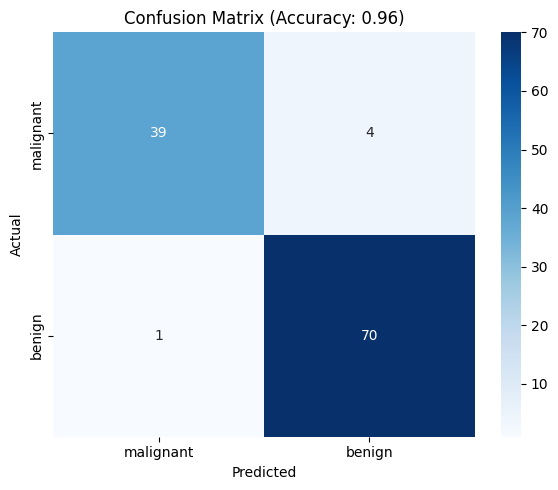

In [11]:
'''11 . Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification.'''

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Binary: 0 (malignant), 1 (benign)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 6: Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.tight_layout()
plt.show()


In [12]:
'''12 .Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load binary dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [13]:
'''13 .  Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance'''
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Generate imbalanced dataset (90% of class 0, 10% of class 1)
X, y = make_classification(n_samples=1000, n_features=10,
                           n_classes=2, weights=[0.9, 0.1],
                           n_informative=5, n_redundant=2,
                           random_state=42)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train without class weights (default)
model_default = LogisticRegression(solver='liblinear')
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

print("Without Class Weights:")
print(classification_report(y_test, y_pred_default))

# Step 4: Train with class_weight='balanced'
model_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("\nWith class_weight='balanced':")
print(classification_report(y_test, y_pred_weighted))


Without Class Weights:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       179
           1       0.83      0.24      0.37        21

    accuracy                           0.92       200
   macro avg       0.88      0.62      0.66       200
weighted avg       0.91      0.92      0.89       200


With class_weight='balanced':
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       179
           1       0.35      0.81      0.49        21

    accuracy                           0.82       200
   macro avg       0.66      0.82      0.69       200
weighted avg       0.91      0.82      0.85       200



In [14]:
'''14 . Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance.'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Load Titanic dataset
# If you're using seaborn version, use: sns.load_dataset("titanic")
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Step 2: Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
df = df[features + [target]]

# Step 3: Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Step 4: Encode categorical variables
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoders if needed later

# Step 5: Split data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, r_


SyntaxError: incomplete input (ipython-input-14-4074032737.py, line 33)

In [15]:
'''15 . Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Without Scaling --------------------
model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# -------------------- With Standardization --------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# -------------------- Print Results --------------------
print(f"Accuracy without Scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy with Standardization: {accuracy_scaled:.4f}")


Accuracy without Scaling: 0.9561
Accuracy with Standardization: 0.9737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
'''16 . Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Step 1: Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Step 5: Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9977


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
'''17 .Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression with C=0.5
model = LogisticRegression(C=0.5, max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy with C=0.5: {accuracy:.4f}")


Model Accuracy with C=0.5: 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
'''18 .Write a Python program to train Logistic Regression and identify important features based on model
coefficients'''
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train, y_train)

# Step 4: Extract feature importances
coefficients = model.coef_[0]  # shape: (n_features,)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
})

# Step 5: Sort by importance and display top features
top_features = feature_importance.sort_values(by='Importance', ascending=False)

print("Top Important Features based on Logistic Regression Coefficients:\n")
print(top_features.head(10))


Top Important Features based on Logistic Regression Coefficients:

                 Feature  Coefficient  Importance
0            mean radius     2.132484    2.132484
26       worst concavity    -1.617969    1.617969
11         texture error     1.442984    1.442984
20          worst radius     1.232150    1.232150
25     worst compactness    -1.208985    1.208985
28        worst symmetry    -0.742764    0.742764
6         mean concavity    -0.651940    0.651940
27  worst concave points    -0.615251    0.615251
5       mean compactness    -0.415569    0.415569
21         worst texture    -0.404581    0.404581


In [19]:
'''19 . Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score.'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Binary classes: 0 and 1

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = model.predict(X_test)

# Step 5: Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.9053


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


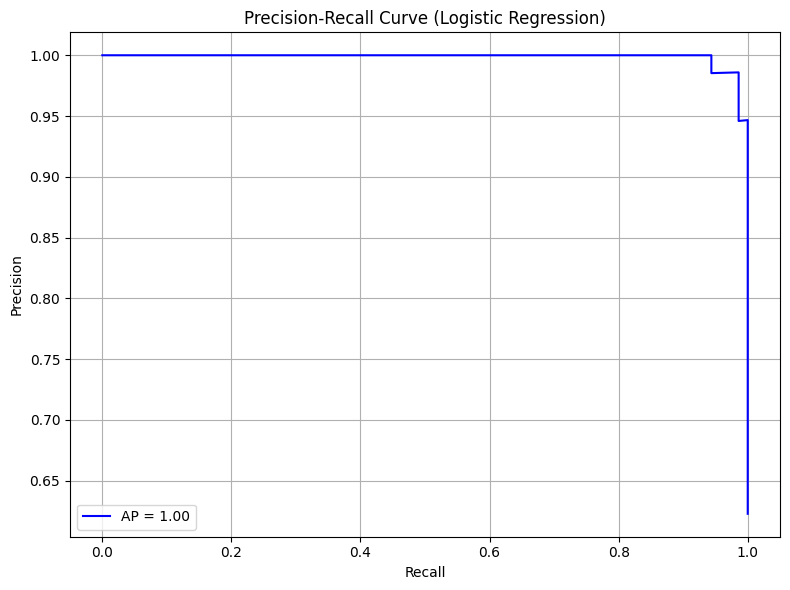

In [20]:
'''20 . Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classificatio'''

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

# Step 1: Load binary dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Binary: 0 (malignant), 1 (benign)

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict probabilities for positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Step 5: Compute precision-recall pairs and average precision
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Step 6: Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
'''21 .Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

# Step 4: Train and evaluate model for each solver
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=300)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[solver] = acc
    except Exception as e:
        results[solver] = f"Failed: {e}"

# Step 5: Print accuracy for each solver
print("Solver Comparison (Accuracy on Test Set):")
for solver, acc in results.items():
    print(f"{solver}: {acc}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Comparison (Accuracy on Test Set):
liblinear: 0.956140350877193
saga: 0.956140350877193
lbfgs: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
'''22 . Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC)'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef

# Step 1: Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Binary: 0 (malignant), 1 (benign)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict labels
y_pred = model.predict(X_test)

# Step 5: Evaluate using Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.9068


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
'''23 . Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train_raw, y_train)
y_pred_raw = model_raw.predict(X_test_raw)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Step 4: Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# Step 5: Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Step 6: Print comparison
print(f"Accuracy on Raw Data:         {acc_raw:.4f}")
print(f"Accuracy on Standardized Data: {acc_scaled:.4f}")


Accuracy on Raw Data:         0.9561
Accuracy on Standardized Data: 0.9737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
'''24 . Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Set up Logistic Regression and parameter grid for C
model = LogisticRegression(max_iter=300, solver='liblinear')
param_grid = {'C': np.logspace(-3, 3, 10)}  # Test C values from 0.001 to 1000

# Step 4: Grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 5: Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 6: Print results
print("Best C (Regularization Strength):", grid_search.best_params_['C'])
print(f"Test Accuracy with Best C: {test_accuracy:.4f}")


Best C (Regularization Strength): 10.0
Test Accuracy with Best C: 0.9561


In [25]:
'''25 . Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions'''


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Save model to disk
joblib.dump(model, 'logistic_model.joblib')
print("Model saved as 'logistic_model.joblib'.")

# Step 5: Load model from disk
loaded_model = joblib.load('logistic_model.joblib')

# Step 6: Make predictions with loaded model
y_pred = loaded_model.predict(X_test)

# Step 7: Evaluate loaded model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of loaded model: {accuracy:.4f}")


Model saved as 'logistic_model.joblib'.
Accuracy of loaded model: 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
